<a href="https://colab.research.google.com/github/ydicsey/image-processing/blob/main/skeletonization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import the library
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

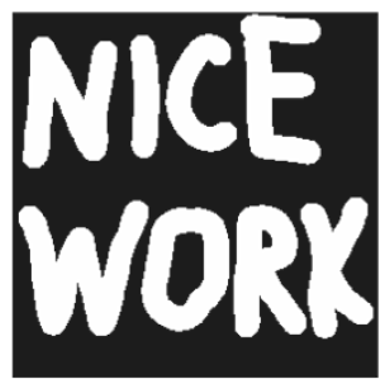

(336, 336)

In [ ]:
img_path = 'input.png'
img = cv.imread(img_path, 0)

plt.axis('off')
plt.imshow(img, cmap="gray")
plt.show()
img.shape

In [ ]:
kernel = cv.getStructuringElement(cv.MORPH_CROSS, (3, 3))

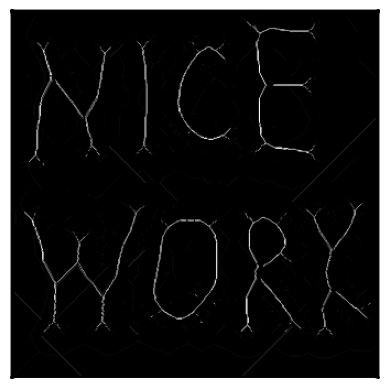

In [ ]:
# _, img = cv.threshold(img, 127, 255, 0)
skeleton = np.zeros(img.shape, np.uint8)
done = False

while( not done):
    erosion = cv.erode(img, kernel)
    opening = cv.morphologyEx(img, cv.MORPH_OPEN, kernel)
    # print(cv.countNonZero(opening))
    if( cv.countNonZero(opening) == 0):
        done = True
    opening = cv.subtract(img, opening)
    skeleton = cv.bitwise_or(skeleton, opening)
    img = erosion.copy()

plt.axis('off')
plt.imshow(skeleton, cmap="gray")
plt.show()

In [ ]:
img = cv.imread('input.png',0)
size = np.size(img)
skel = np.zeros(img.shape,np.uint8)

ret,img = cv.threshold(img,127,255,0)
element = cv.getStructuringElement(cv.MORPH_CROSS,(3,3))
done = False

while( not done):
    eroded = cv.erode(img,element)
    temp = cv.dilate(eroded,element)
    temp = cv.subtract(img,temp)
    skel = cv.bitwise_or(skel,temp)
    img = eroded.copy()

    zeros = size - cv.countNonZero(img)
    if zeros==size:
        done = True


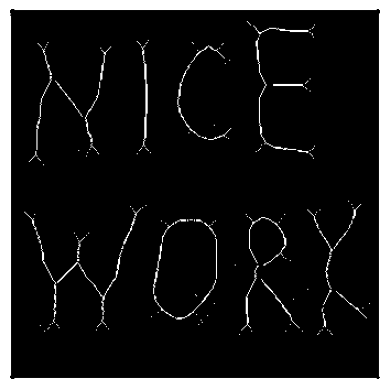

In [ ]:
plt.axis('off')
plt.imshow(skel, cmap="gray")
plt.show()